Consigna
En grupos de 2 o 3 personas, realizar los siguientes ejercicios.

1) Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

2) Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

3) Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

4)Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.
Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.
Responder las mismas preguntas que en el punto 5 para este caso.

Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

Escribir una conclusión sobre el trabajo realizado.

Bonus
Investigar los métodos GridSearch y RandomSearch para la búsqueda de hiperparámetros. Utilizarlos para encontrar los mejores hiperparámetros para los modelos.

Para ya sea el atributo categórico como para el numérico, elegir otro modelo de clasificación o regresión que no haya sido utilizado anteriormente. Entrenar el modelo y comparar los resultados con los obtenidos anteriormente.

Formato de entrega
El trabajo práctico se debe realizar en un notebook de Jupyter. El notebook debe estar subido a un repositorio de GitHub. El link al repositorio debe ser completado en el siguiente Google Form.

Fecha de entrega
El trabajo práctico se debe entregar hasta el 17/09/2023 a las 23:59hs.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pelisDta.csv')

In [3]:
df

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...,...,...
2527,998,The Invisible Man,James Whale,1933,71,Horror,7.6,87,0.00
2528,998,The Invisible Man,James Whale,1933,71,Sci-Fi,7.6,87,0.00
2529,999,Cell 211,Daniel Monzón,2009,113,Action,7.6,0,0.00
2530,999,Cell 211,Daniel Monzón,2009,113,Crime,7.6,0,0.00


In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
sns.set_theme(style = 'whitegrid')

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='gross(M)', ylabel='rating'>

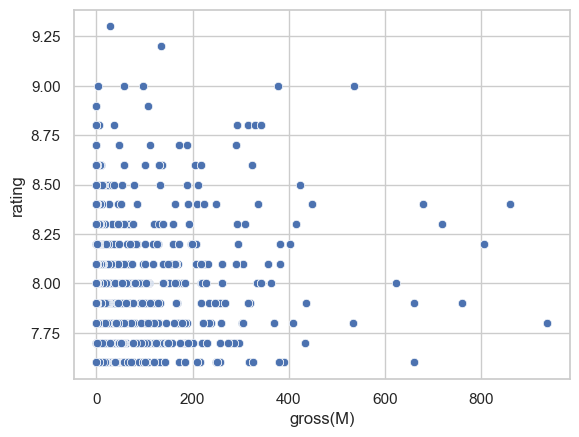

In [8]:

sns.scatterplot(data = df, x = 'gross(M)', y = 'rating' )

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='metascore', ylabel='Count'>

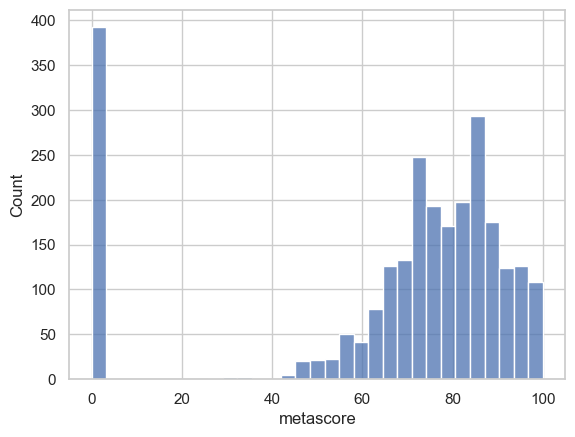

In [9]:
sns.histplot(data = df, x = 'metascore')

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='release_year', ylabel='Count'>

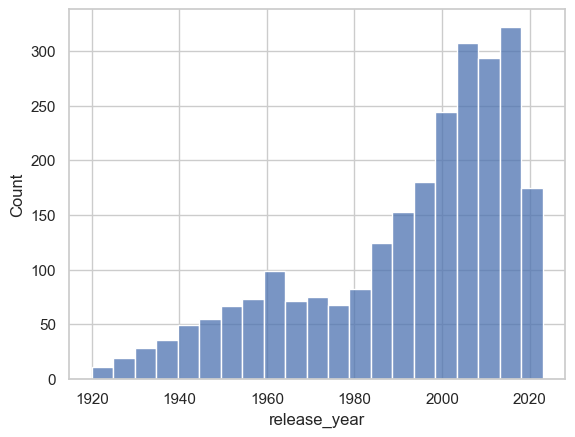

In [10]:
sns.histplot(data = df, x = 'release_year')

c:\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

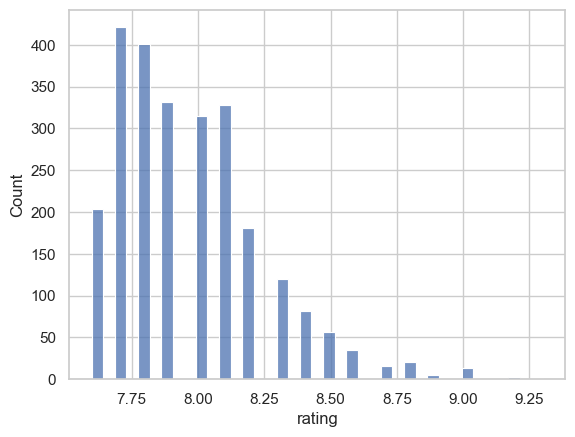

In [11]:
sns.histplot(data = df, x = 'rating')

In [12]:
#CUANTOS GENEROS DE PELICULAS HAY?
df['genre'].unique()

array(['Drama', 'Crime', 'Action', 'Biography', 'History', 'Adventure',
       'Animation', 'Sci-Fi', 'Romance', 'Western', 'Mystery', 'Comedy',
       'Fantasy', 'War', 'Thriller', 'Family', 'Horror', 'Music',
       'Film-Noir', 'Musical', 'Sport'], dtype=object)

Atributo Numerico elegido: Run time o Gross(M)(esto es cuanta ganancia genero)
Atributo Categorico elegido: Genero

In [14]:
from sklearn import datasets, linear_model, model_selection

In [15]:
model = linear_model.LinearRegression()

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.4, random_state = 42)

In [17]:
train

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
2145,850,The Great Beauty,Paolo Sorrentino,2013,141,Drama,7.7,86,2.85
1647,651,Captain Fantastic,Matt Ross,2016,118,Comedy,7.8,72,5.88
436,171,Monty Python and the Holy Grail,Terry Gilliam,1975,91,Fantasy,8.2,91,1.23
1033,411,The Legend of 1900,Giuseppe Tornatore,1998,169,Drama,8.0,58,0.26
2249,890,A Man for All Seasons,Fred Zinnemann,1966,120,Drama,7.7,72,28.35
...,...,...,...,...,...,...,...,...,...
1638,647,Captain America: The Winter Soldier,Anthony Russo,2014,136,Adventure,7.8,70,259.77
1095,436,Secrets & Lies,Mike Leigh,1996,136,Drama,8.0,91,13.42
1130,453,Ivan's Childhood,Andrei Tarkovsky,1962,95,War,8.0,0,0.00
1294,515,Bound by Honor,Taylor Hackford,1993,180,Crime,7.9,47,4.50


In [18]:
test

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
2309,917,The Breadwinner,Nora Twomey,2017,94,Drama,7.7,78,0.31
2057,814,The French Connection,William Friedkin,1971,104,Action,7.7,94,15.63
194,75,WALL·E,Andrew Stanton,2008,98,Adventure,8.4,95,223.81
1393,551,The Big Sleep,Howard Hawks,1946,114,Mystery,7.9,86,6.54
764,304,Dil Chahta Hai,Farhan Akhtar,2001,183,Comedy,8.1,0,0.30
...,...,...,...,...,...,...,...,...,...
2080,822,Empire of the Sun,Steven Spielberg,1987,153,War,7.7,62,22.24
257,102,2001: A Space Odyssey,Stanley Kubrick,1968,149,Adventure,8.3,84,56.95
1344,534,Sing Street,John Carney,2016,106,Drama,7.9,79,3.24
1875,739,Once Upon a Time in Anatolia,Nuri Bilge Ceylan,2011,157,Drama,7.8,82,0.14
